<a href="https://colab.research.google.com/github/TranDangKhoi-20146356/AI/blob/main/week6DC_mobilerobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a9ce9757fc3a45a40cbe43235d3b13abbdfc9f199ea16c85f37f97385f1324da
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


161.26203679637874


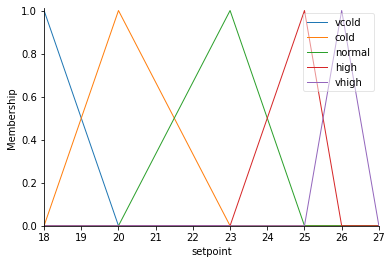

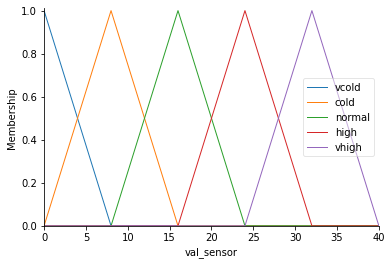

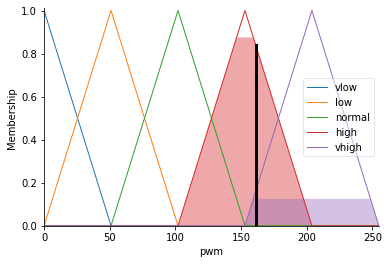

In [ ]:
#nhiet do (lam mat)
setpoint = ctrl.Antecedent(np.arange(18,28,1),'setpoint')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')
time = ctrl.Consequent(np.arange(0,61,1),'time')

setpoint['vcold'] = fuzz.trimf(setpoint.universe,[18,18,20])
setpoint['cold'] = fuzz.trimf(setpoint.universe,[18,20,23])
setpoint['normal']  = fuzz.trimf(setpoint.universe,[20,23,25])
setpoint['high']  = fuzz.trimf(setpoint.universe,[23,25,26])
setpoint['vhigh']  = fuzz.trimf(setpoint.universe,[25,26,27])


val_sensor['vcold'] = fuzz.trimf(val_sensor.universe,[0,0,8])
val_sensor['cold'] = fuzz.trimf(val_sensor.universe,[0,8,16])
val_sensor['normal']  = fuzz.trimf(val_sensor.universe,[8,16,24])
val_sensor['high']  = fuzz.trimf(val_sensor.universe,[16,24,32])
val_sensor['vhigh']  = fuzz.trimf(val_sensor.universe,[24,32,40])


pwm['vlow'] = fuzz.trimf(pwm.universe,[0,0,51])
pwm['low'] = fuzz.trimf(pwm.universe,[0,51,102])
pwm['normal']  = fuzz.trimf(pwm.universe,[51,102,153])
pwm['high']  = fuzz.trimf(pwm.universe,[102,153,204])
pwm['vhigh']  = fuzz.trimf(pwm.universe,[153,204,255])

time['vfast'] = fuzz.trimf(time.universe,[0,0,12])
time['fast'] = fuzz.trimf(time.universe,[0,12,24])
time['normal']  = fuzz.trimf(time.universe,[12,24,36])
time['low']  = fuzz.trimf(time.universe,[24,36,48])
time['low']  = fuzz.trimf(time.universe,[36,48,60])




setpoint.view()
val_sensor.view()



#rule
rule1= ctrl.Rule(setpoint['vcold'] & val_sensor['vcold'],pwm['vlow'])
rule2= ctrl.Rule(setpoint['vcold']& val_sensor['cold'],pwm['low'])
rule3= ctrl.Rule(setpoint['vcold']& val_sensor['normal'],pwm['high'])
rule4= ctrl.Rule(setpoint['vcold']& val_sensor['high'],pwm['vhigh'])
rule5= ctrl.Rule(setpoint['vcold']& val_sensor['vhigh'],pwm['vhigh'])


rule6= ctrl.Rule(setpoint['cold']& val_sensor['vcold'],pwm['low'])
rule7= ctrl.Rule(setpoint['cold']& val_sensor['cold'],pwm['vlow'])
rule8= ctrl.Rule(setpoint['cold']& val_sensor['normal'],pwm['low'])
rule9= ctrl.Rule(setpoint['cold']& val_sensor['high'],pwm['high'])
rule10= ctrl.Rule(setpoint['cold']& val_sensor['vhigh'],pwm['vhigh'])


rule11= ctrl.Rule(setpoint['normal']& val_sensor['vcold'],pwm['vhigh'])
rule12= ctrl.Rule(setpoint['normal']& val_sensor['cold'],pwm['high'])
rule13= ctrl.Rule(setpoint['normal']& val_sensor['normal'],pwm['normal'])
rule14= ctrl.Rule(setpoint['normal']& val_sensor['high'],pwm['low'])
rule15= ctrl.Rule(setpoint['normal']& val_sensor['vhigh'],pwm['vlow'])


rule16= ctrl.Rule(setpoint['high']& val_sensor['vcold'],pwm['vhigh'])
rule17= ctrl.Rule(setpoint['high']& val_sensor['cold'],pwm['high'])
rule18= ctrl.Rule(setpoint['high']& val_sensor['normal'],pwm['high'])
rule19= ctrl.Rule(setpoint['high']& val_sensor['high'],pwm['low'])
rule20= ctrl.Rule(setpoint['high']& val_sensor['vhigh'],pwm['vlow'])

rule21= ctrl.Rule(setpoint['vhigh']& val_sensor['vcold'],pwm['vhigh'])
rule22= ctrl.Rule(setpoint['vhigh']& val_sensor['cold'],pwm['vhigh'])
rule23= ctrl.Rule(setpoint['vhigh']& val_sensor['normal'],pwm['vhigh'])
rule24= ctrl.Rule(setpoint['vhigh']& val_sensor['high'],pwm['high'])
rule25= ctrl.Rule(setpoint['vhigh']& val_sensor['vhigh'],pwm['normal'])



#view
temperature = ctrl.ControlSystem([rule1,rule2,rule3,
                               rule4,rule5,rule6,
                               rule7,rule8,rule9,
                               rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])

temperature = ctrl.ControlSystemSimulation(temperature)
temperature.input['setpoint']= 20
temperature.input['val_sensor']= 25
temperature.compute()
print(temperature.output['pwm'])
pwm.view(sim = temperature)



In [ ]:
#mobile robot


L= ctrl.Antecedent(np.arange(0,91,1),'L')
R = ctrl.Antecedent(np.arange(90,180,1),'R')
C = ctrl.Antecedent(np.arange(0,21,1),'C')
LC= ctrl.Consequent(np.arange(0,91,1),'LC')
RC = ctrl.Consequent(np.arange(90,180,1),'RC')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')



L['vlittle']=fuzz.trimf(L.universe,[0,0,22.5])
L['little']=fuzz.trimf(L.universe,[0,22.5,45])
L['more']=fuzz.trimf(L.universe,[22.5,45,67.5])
L['vmore']=fuzz.trimf(L.universe,[45,67.5,90])

C['close'] =fuzz.trimf(C.universe,[0,0,10])
C['far']=fuzz.trimf(C.universe,[0,10,20])

R['vlittle'] =fuzz.trimf(R.universe,[0,0,122.5])
R['little']=fuzz.trimf(R.universe,[0,122.5,135])
R['more']=fuzz.trimf(R.universe,[122.5,135,157.5])
R['vmore']=fuzz.trimf(R.universe,[135,157.5,180])


LC['vlittle']=fuzz.trimf(LC.universe,[0,0,22.5])
LC['little']=fuzz.trimf(LC.universe,[0,22.5,45])
LC['more']=fuzz.trimf(LC.universe,[22.5,45,67.5])
LC['vmore']=fuzz.trimf(LC.universe,[45,67.5,90])


RC['vlittle'] =fuzz.trimf(RC.universe,[0,0,122.5])
RC['little']=fuzz.trimf(RC.universe,[0,122.5,135])
RC['more']=fuzz.trimf(RC.universe,[122.5,135,157.5])
RC['vmore']=fuzz.trimf(RC.universe,[135,157.5,180])

pwm['vlow'] = fuzz.trimf(pwm.universe,[0,0,51])
pwm['low'] = fuzz.trimf(pwm.universe,[0,51,102])
pwm['normal']  = fuzz.trimf(pwm.universe,[51,102,153])
pwm['high']  = fuzz.trimf(pwm.universe,[102,153,204])
pwm['vhigh']  = fuzz.trimf(pwm.universe,[153,204,255])


#rule 

rule1= ctrl.Rule(setpoint['vcold'] & val_sensor['vcold'],pwm['vlow'])
rule2= ctrl.Rule(setpoint['vcold']& val_sensor['cold'],pwm['low'])
rule3= ctrl.Rule(setpoint['vcold']& val_sensor['normal'],pwm['high'])
rule4= ctrl.Rule(setpoint['vcold']& val_sensor['high'],pwm['vhigh'])
rule5= ctrl.Rule(setpoint['vcold']& val_sensor['vhigh'],pwm['vhigh'])


rule6= ctrl.Rule(setpoint['cold']& val_sensor['vcold'],pwm['low'])
rule7= ctrl.Rule(setpoint['cold']& val_sensor['cold'],pwm['vlow'])
rule8= ctrl.Rule(setpoint['cold']& val_sensor['normal'],pwm['low'])
rule9= ctrl.Rule(setpoint['cold']& val_sensor['high'],pwm['high'])
rule10= ctrl.Rule(setpoint['cold']& val_sensor['vhigh'],pwm['vhigh'])


rule11= ctrl.Rule(setpoint['normal']& val_sensor['vcold'],pwm['vhigh'])
rule12= ctrl.Rule(setpoint['normal']& val_sensor['cold'],pwm['high'])
rule13= ctrl.Rule(setpoint['normal']& val_sensor['normal'],pwm['normal'])
rule14= ctrl.Rule(setpoint['normal']& val_sensor['high'],pwm['low'])
rule15= ctrl.Rule(setpoint['normal']& val_sensor['vhigh'],pwm['vlow'])


rule16= ctrl.Rule(setpoint['high']& val_sensor['vcold'],pwm['vhigh'])
rule17= ctrl.Rule(setpoint['high']& val_sensor['cold'],pwm['high'])
rule18= ctrl.Rule(setpoint['high']& val_sensor['normal'],pwm['high'])
rule19= ctrl.Rule(setpoint['high']& val_sensor['high'],pwm['low'])
rule20= ctrl.Rule(setpoint['high']& val_sensor['vhigh'],pwm['vlow'])

rule21= ctrl.Rule(setpoint['vhigh']& val_sensor['vcold'],pwm['vhigh'])
rule22= ctrl.Rule(setpoint['vhigh']& val_sensor['cold'],pwm['vhigh'])
rule23= ctrl.Rule(setpoint['vhigh']& val_sensor['normal'],pwm['vhigh'])
rule24= ctrl.Rule(setpoint['vhigh']& val_sensor['high'],pwm['high'])
rule25= ctrl.Rule(setpoint['vhigh']& val_sensor['vhigh'],pwm['normal'])







